In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np
import glob

Dua kode di bawah untuk download dan unzip dataset

In [2]:
!pip install googledrivedownloader
from google_drive_downloader import GoogleDriveDownloader as gdd

In [3]:
gdd.download_file_from_google_drive(file_id='18O90Nag0DGs4eVHyceVKiXVmVsjkRD6Q',
                                    dest_path='/content/Budayaku_dataset.zip',
                                    unzip=True)

Unzipping...Done.


untuk ngecek kode di atas

In [4]:
image_count = len(list(glob.glob('/content/Budayaku_dataset/*/*.jpg')))
print(image_count)

675


Membagi data menjadi test data dan validation data

In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/Budayaku_dataset/',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 675 files belonging to 13 classes.
Using 540 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/Budayaku_dataset/',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 675 files belonging to 13 classes.
Using 135 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['Baileo', 'Baloy_Mayo', 'Belah_Bubung', 'Bubungan_Lima', 'Dulohupa', 'Gapura_Candi_Bentar', 'Honai', 'Istana_Kesultanan_Kadariyah', 'Jabu_Bolon', 'Joglo', 'Keraton_Kesepuhan_Cirebon', 'Loka_Samawa', 'Mod_Aki_Aksa']


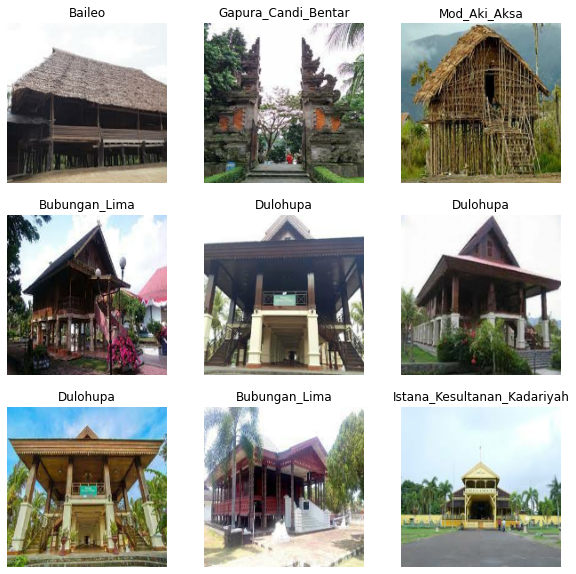

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype(np.uint8))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Membuat model

In [12]:
num_classes = 13

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

Melatih model

In [14]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
17/17 [==============================] - 18s 970ms/step - loss: 95.3422 - accuracy: 0.1074 - val_loss: 2.5948 - val_accuracy: 0.1556
Epoch 2/10
17/17 [==============================] - 16s 945ms/step - loss: 2.2680 - accuracy: 0.3111 - val_loss: 2.0512 - val_accuracy: 0.3852
Epoch 3/10
17/17 [==============================] - 16s 950ms/step - loss: 1.0711 - accuracy: 0.6759 - val_loss: 1.7074 - val_accuracy: 0.6222
Epoch 4/10
17/17 [==============================] - 16s 945ms/step - loss: 0.3084 - accuracy: 0.9167 - val_loss: 1.7646 - val_accuracy: 0.6222
Epoch 5/10
17/17 [==============================] - 16s 948ms/step - loss: 0.0913 - accuracy: 0.9815 - val_loss: 1.7764 - val_accuracy: 0.6296
Epoch 6/10
17/17 [==============================] - 16s 949ms/step - loss: 0.1102 - accuracy: 0.9852 - val_loss: 2.0981 - val_accuracy: 0.6000
Epoch 7/10
17/17 [==============================] - 16s 946ms/step - loss: 0.0352 - accuracy: 0.9926 - val_loss: 1.9755 - val_accuracy: 0.622

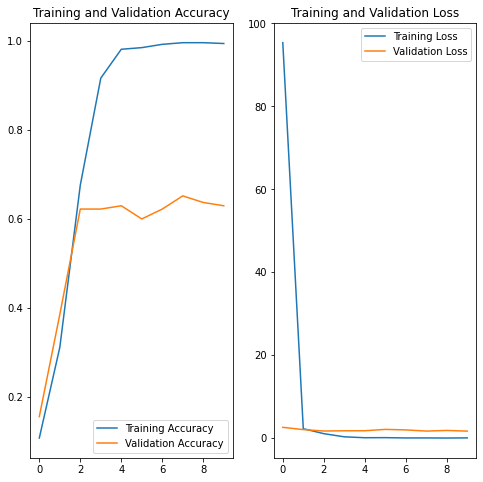

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()